<a href="https://colab.research.google.com/github/AbinReji07/Titanic-Survival-Predictor/blob/main/titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("/content/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
df.shape

(891, 12)

In [3]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [4]:
df=df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)

In [5]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [6]:
int(df['Age'].mean())

29

In [7]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

/tmp/ipython-input-7-2595122914.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(),inplace=True)


In [8]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [9]:
df.dtypes

,0
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object


In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])
df["Embarked"]=le.fit_transform(df["Embarked"])



In [11]:
df["Embarked"].fillna(df["Embarked"].mean(),inplace=True)

/tmp/ipython-input-11-3633118048.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mean(),inplace=True)


In [12]:
x=df.iloc[:,1:]
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [13]:
y=df["Survived"]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [14]:
y.value_counts()

,count
Survived,
0,549
1,342


In [15]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE(random_state=1)
x_os,y_os=oversample.fit_resample(x,y)

In [16]:
y_os.value_counts()

,count
Survived,
0,549
1,549


In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_os)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_os,test_size=0.3,random_state=1)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.svm import SVC
sv=SVC()
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()


In [20]:
from sklearn.metrics import classification_report

In [21]:
lst=[knn,nb,dt,lr,sv,rf]
for i in lst:
  print("-------",i,"-------")
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(classification_report(y_test,y_pred))

------- KNeighborsClassifier() -------
              precision    recall  f1-score   support

           0       0.77      0.85      0.80       155
           1       0.85      0.77      0.81       175

    accuracy                           0.81       330
   macro avg       0.81      0.81      0.81       330
weighted avg       0.81      0.81      0.81       330

------- GaussianNB() -------
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       155
           1       0.82      0.75      0.79       175

    accuracy                           0.78       330
   macro avg       0.78      0.78      0.78       330
weighted avg       0.78      0.78      0.78       330

------- DecisionTreeClassifier() -------
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       155
           1       0.79      0.83      0.81       175

    accuracy                           0.80       330
   macro avg       

In [22]:
from sklearn.model_selection import GridSearchCV
p={"n_estimators":[10,20,30,40,50],"criterion":["gini","entropy","log_loss"],"max_depth":[1,3,5]}

gr=GridSearchCV(rf,p,cv=10,scoring="accuracy",)
gr.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 3, 5],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [23]:
print(gr.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 40}


In [24]:
rf1=RandomForestClassifier(n_estimators=50,criterion="log_loss",max_depth=5)
rf1.fit(x_train,y_train)

RandomForestClassifier(criterion='log_loss', max_depth=5, n_estimators=50)

In [25]:
y_pred1=rf1.predict(x_test)

In [26]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       155
           1       0.86      0.77      0.81       175

    accuracy                           0.81       330
   macro avg       0.81      0.81      0.81       330
weighted avg       0.82      0.81      0.81       330



In [27]:
import joblib
joblib.dump(rf,"model.joblib")
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

## streamlit

In [28]:
!pip install streamlit --quiet
import streamlit as st

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.9 MB/s eta 0:00:00


In [29]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd
import os

st.set_page_config(page_title="Titanic Survival Predictor", page_icon="🚢")

st.title("🚢 Titanic Survival Predictor")
st.write("Enter passenger details to predict the likelihood of survival.")

# Load model and scaler
model_path = "model.joblib"
scaler_path = "scaler.joblib"

if not os.path.exists(model_path) or not os.path.exists(scaler_path):
    st.error("Model or scaler file not found. Please ensure 'model.joblib' and 'scaler.joblib' are available.")
    st.stop()

model = joblib.load(model_path)
scaler = joblib.load(scaler_path)

# Input fields
pclass = st.selectbox("Passenger Class (Pclass)", [1, 2, 3])
sex = st.selectbox("Sex", ["male", "female"])
age = st.number_input("Age", min_value=0.0, max_value=100.0, step=0.5)
sibsp = st.number_input("Number of Siblings/Spouses Aboard (SibSp)", min_value=0, max_value=10, step=1)
parch = st.number_input("Number of Parents/Children Aboard (Parch)", min_value=0, max_value=10, step=1)
fare = st.number_input("Ticket Fare", min_value=0.0, max_value=600.0, step=1.0)
embarked = st.selectbox("Port of Embarkation", ["S", "C", "Q"])

# Convert categorical inputs
sex = 1 if sex == "female" else 0
embarked_dict = {"S": 0, "C": 1, "Q": 2}
embarked = embarked_dict[embarked]

# Create input DataFrame
input_data = pd.DataFrame({
    'Pclass': [pclass],
    'Sex': [sex],
    'Age': [age],
    'SibSp': [sibsp],
    'Parch': [parch],
    'Fare': [fare],
    'Embarked': [embarked]
})

# Apply scaling
input_scaled = scaler.transform(input_data)

# Prediction
if st.button("Predict Survival"):
    try:
        prediction = model.predict(input_scaled)
        result = "✅ The passenger is likely to **survive**." if prediction[0] == 1 else "❌ The passenger is likely **not to survive**."
        st.success(result)
        st.subheader("Entered Details")
        st.dataframe(input_data)
    except Exception as e:
        st.error(f"Prediction failed: {e}")


Writing app.py


In [30]:
!npm install -g localtunnel
!npm install -g npm@latest

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋
added 22 packages in 5s
⠋
⠋3 packages are looking for funding
⠋  run `npm fund` for details
⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏
removed 9 packages, and changed 107 packages in 20s
⠏
⠏25 packages are looking for funding
⠏  run `npm fund` for details
⠏

In [31]:
!wget -q -O - ipv4.icanhazip.com

34.139.110.46


In [32]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴⠦⠧⠇
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.139.110.46:8501

your url is: https://forty-rocks-divide.loca.lt
  Stopping...
^C


## graphs

/tmp/ipython-input-33-2512073009.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', palette='Set2', ax=axs[0, 0])
/tmp/ipython-input-33-2512073009.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y='Fare', palette='Set3', ax=axs[2, 0])
/tmp/ipython-input-33-2512073009.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2, 0].set_xticklabels(['Not Survived', 'Survived'])


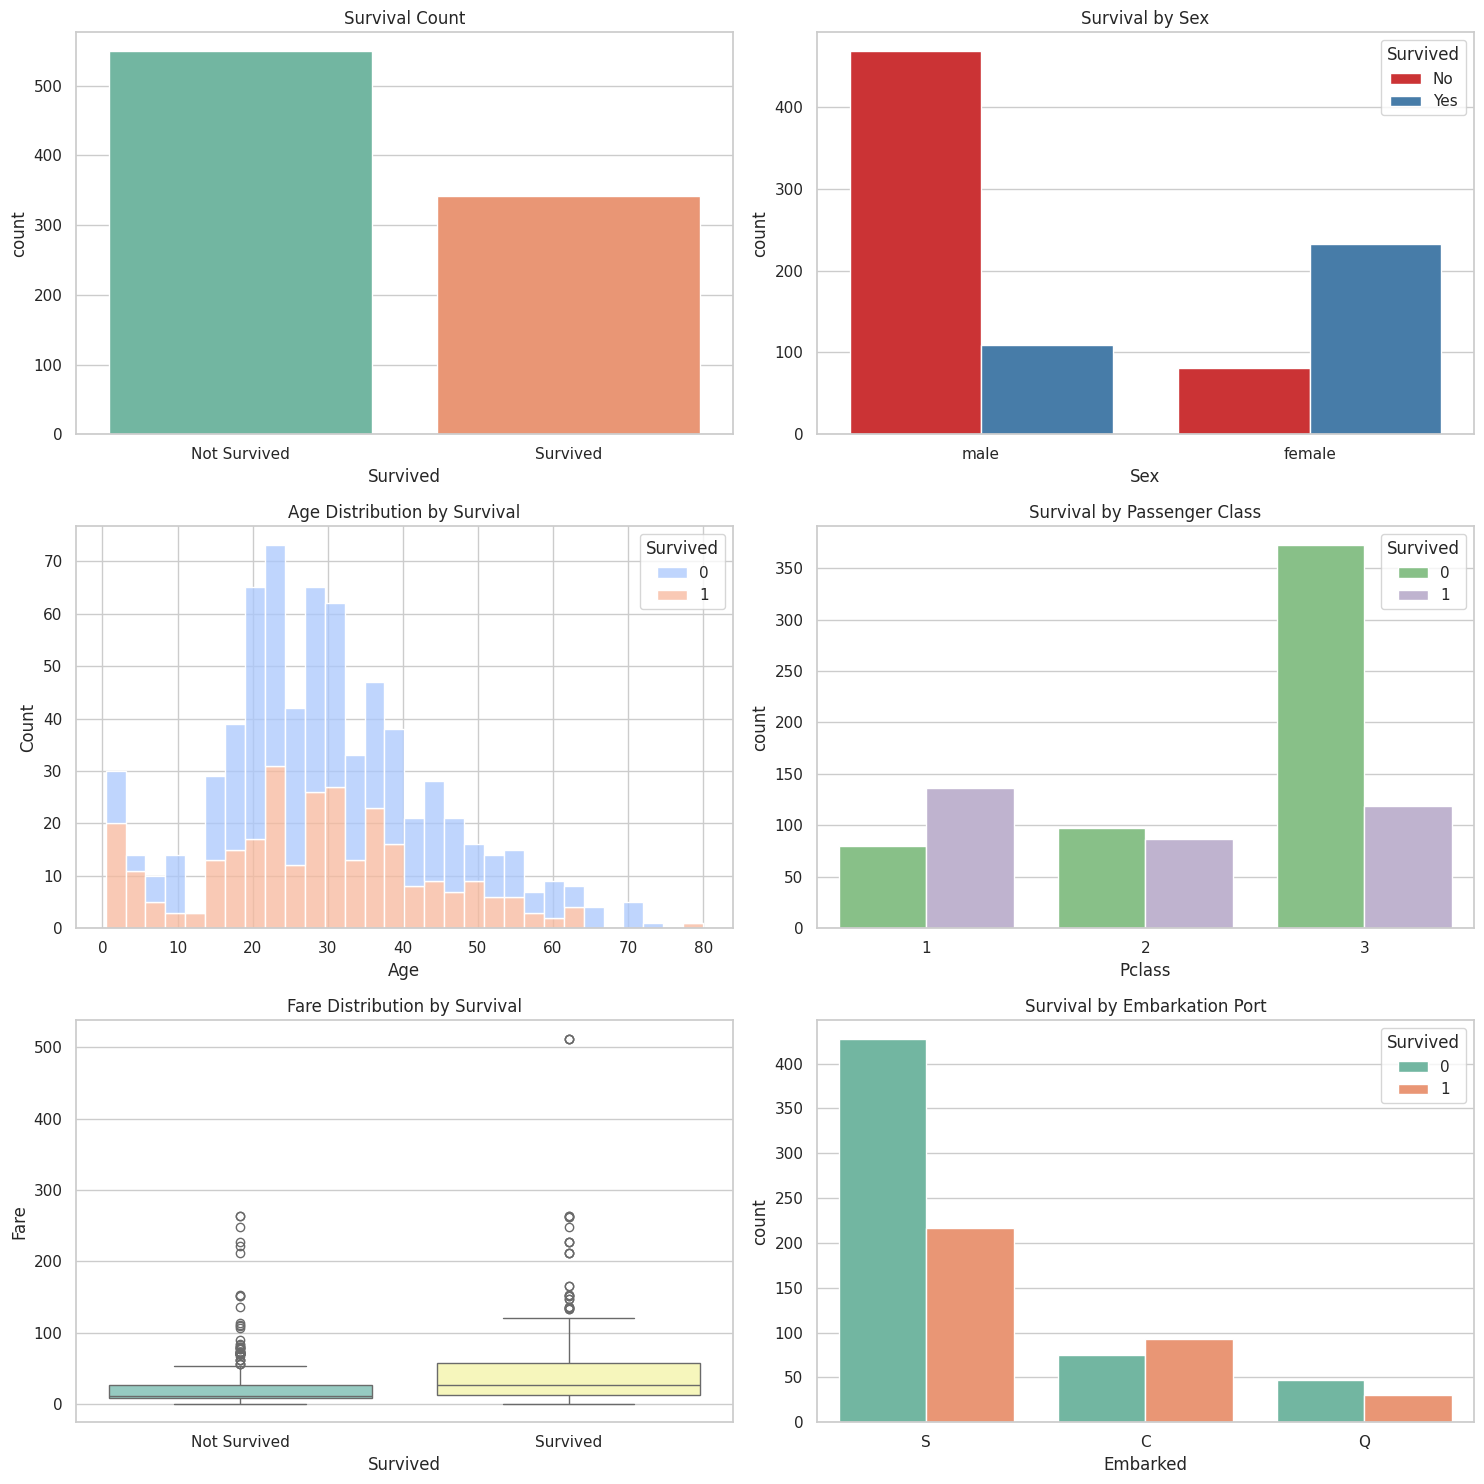

In [33]:

import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("titanic.csv")

# Set style
sns.set(style="whitegrid")

# Create figure layout
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# 1. Survival count
sns.countplot(data=df, x='Survived', palette='Set2', ax=axs[0, 0])
axs[0, 0].set_title("Survival Count")
axs[0, 0].set_xticks([0, 1])
axs[0, 0].set_xticklabels(['Not Survived', 'Survived'])

# 2. Survival by Sex
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set1', ax=axs[0, 1])
axs[0, 1].set_title("Survival by Sex")
axs[0, 1].legend(title='Survived', labels=['No', 'Yes'])

# 3. Age distribution by survival
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30, palette='coolwarm', ax=axs[1, 0])
axs[1, 0].set_title("Age Distribution by Survival")

# 4. Passenger Class vs Survival
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Accent', ax=axs[1, 1])
axs[1, 1].set_title("Survival by Passenger Class")

# 5. Fare vs Survival
sns.boxplot(data=df, x='Survived', y='Fare', palette='Set3', ax=axs[2, 0])
axs[2, 0].set_title("Fare Distribution by Survival")
axs[2, 0].set_xticklabels(['Not Survived', 'Survived'])

# 6. Embarked vs Survival
sns.countplot(data=df, x='Embarked', hue='Survived', palette='Set2', ax=axs[2, 1])
axs[2, 1].set_title("Survival by Embarkation Port")

plt.tight_layout()
plt.show()
